<a href="https://colab.research.google.com/github/asritha7125/WarrantyML/blob/dashboard/dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy matplotlib seaborn plotly scikit-learn


In [ ]:
import pandas as pd
from google.colab import files

# Upload CSV file
uploaded = files.upload()  # select your warranty_final.csv or claims file
for fn in uploaded.keys():
    print('Uploaded file:', fn)

# Load into dataframe
df = pd.read_csv(list(uploaded.keys())[0])
df.head()


Saving claims_with_predictions (2).csv to claims_with_predictions (2).csv
Uploaded file: claims_with_predictions (2).csv


,Product_Type,Region,Purchase_Date,Claim_Date,Warranty_Period,Issue_Type,Severity_Level,Target,Days_To_Claim,Within_Warranty,Approval_Probability,Predicted_Status
0,Smartphone,north,2022-09-20,2023-02-12,12,Screen Damage,Medium,0,145,0,0.374444,Rejected
1,Smartphone,north,2023-10-14,2025-02-22,36,Screen Damage,Medium,1,497,0,0.537626,Approved
2,Smartphone,south,2020-11-08,2020-12-12,12,Motor Fault,Medium,0,34,0,0.245609,Rejected
3,Refrigerator,south,2022-05-25,2023-05-03,12,Cooling Problem,Medium,1,343,0,0.483868,Rejected
4,Refrigerator,south,2021-05-05,2022-06-14,24,Motor Fault,Medium,0,405,0,0.329298,Rejected


In [ ]:
import pandas as pd

# --------------------------
# 1. Check columns
# --------------------------
print("Columns in dataset:", df.columns)

# Use existing warranty column
warranty_col = 'Warranty_Period'

# --------------------------
# 2. Convert date columns
# --------------------------
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'], errors='coerce')
df['Claim_Date'] = pd.to_datetime(df['Claim_Date'], errors='coerce')

# --------------------------
# 3. Create derived columns
# --------------------------
df['Warranty_Expired'] = df['Purchase_Date'] + pd.to_timedelta(df[warranty_col], unit='d') < df['Claim_Date']
df['Days_To_Claim'] = (df['Claim_Date'] - df['Purchase_Date']).dt.days
df['Claim_Under_Warranty'] = ~df['Warranty_Expired']

# --------------------------
# 4. Optional: Count claims per Product_Type + Region
# --------------------------
claims_count = df.groupby(['Product_Type', 'Region']).size().reset_index(name='Num_Claims')
df = df.merge(claims_count, on=['Product_Type', 'Region'], how='left')

# --------------------------
# 5. Check processed data
# --------------------------
print("Columns after preprocessing:", df.columns)
df.head()


Columns in dataset: Index(['Product_Type', 'Region', 'Purchase_Date', 'Claim_Date',
       'Warranty_Period', 'Issue_Type', 'Severity_Level', 'Target',
       'Days_To_Claim', 'Within_Warranty', 'Approval_Probability',
       'Predicted_Status', 'Warranty_Expired', 'Claim_Under_Warranty'],
      dtype='object')
Columns after preprocessing: Index(['Product_Type', 'Region', 'Purchase_Date', 'Claim_Date',
       'Warranty_Period', 'Issue_Type', 'Severity_Level', 'Target',
       'Days_To_Claim', 'Within_Warranty', 'Approval_Probability',
       'Predicted_Status', 'Warranty_Expired', 'Claim_Under_Warranty',
       'Num_Claims'],
      dtype='object')


,Product_Type,Region,Purchase_Date,Claim_Date,Warranty_Period,Issue_Type,Severity_Level,Target,Days_To_Claim,Within_Warranty,Approval_Probability,Predicted_Status,Warranty_Expired,Claim_Under_Warranty,Num_Claims
0,Smartphone,north,2022-09-20,2023-02-12,12,Screen Damage,Medium,0,145,0,0.374444,Rejected,True,False,11
1,Smartphone,north,2023-10-14,2025-02-22,36,Screen Damage,Medium,1,497,0,0.537626,Approved,True,False,11
2,Smartphone,south,2020-11-08,2020-12-12,12,Motor Fault,Medium,0,34,0,0.245609,Rejected,True,False,10
3,Refrigerator,south,2022-05-25,2023-05-03,12,Cooling Problem,Medium,1,343,0,0.483868,Rejected,True,False,7
4,Refrigerator,south,2021-05-05,2022-06-14,24,Motor Fault,Medium,0,405,0,0.329298,Rejected,True,False,7


In [ ]:
# --------------------------
# 1. Total Products
# --------------------------
total_products = df['Product_Type'].nunique()

# --------------------------
# 2. Total Claims
# --------------------------
total_claims = df.shape[0]  # each row is a claim

# --------------------------
# 3. Claims Under Warranty
# --------------------------
claims_under_warranty = df['Claim_Under_Warranty'].sum()

# --------------------------
# 4. Claim Approval Rate
# Assuming 'Target' or 'Predicted_Status' indicates approval
# If Target = 1 means Approved
approval_rate = df['Target'].sum() / total_claims * 100

# --------------------------
# 5. Average Days to Claim
# --------------------------
avg_days_to_claim = df['Days_To_Claim'].mean()

# --------------------------
# 6. Print KPIs
# --------------------------
print("========== KPI Metrics ==========")
print("Total Products:", total_products)
print("Total Claims:", total_claims)
print("Claims Under Warranty:", claims_under_warranty)
print("Claim Approval Rate:", round(approval_rate, 2), "%")
print("Average Days to Claim:", round(avg_days_to_claim, 2))


========== KPI Metrics ==========
Total Products: 5
Total Claims: 262
Claims Under Warranty: 12
Claim Approval Rate: 28.63 %
Average Days to Claim: 396.4


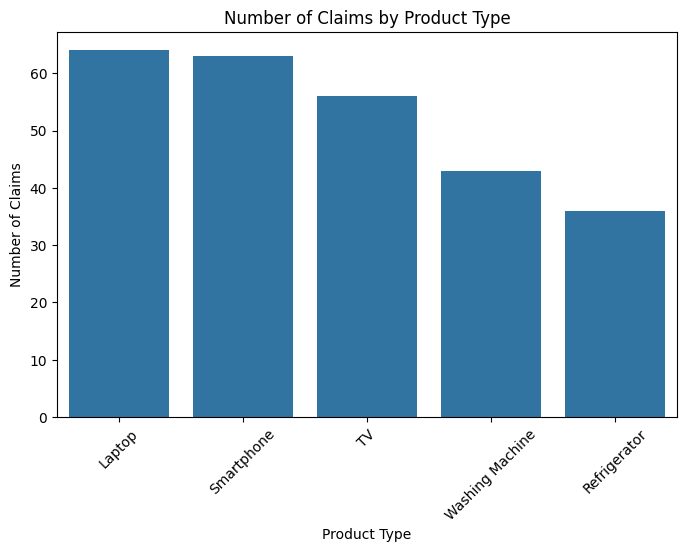

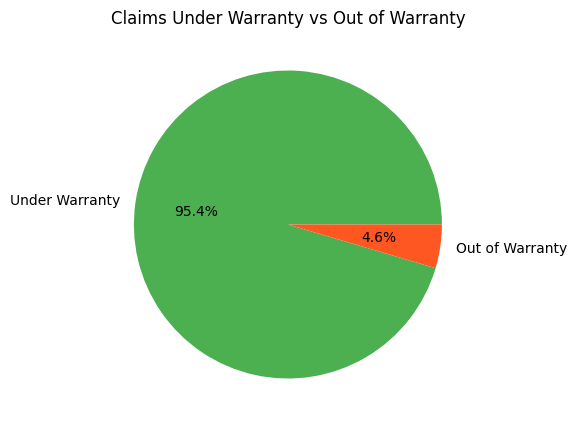

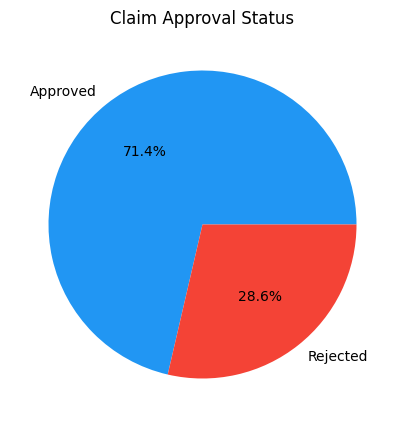

/tmp/ipython-input-1772164215.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_days, x='Product_Type', y='Days_To_Claim', palette='viridis')


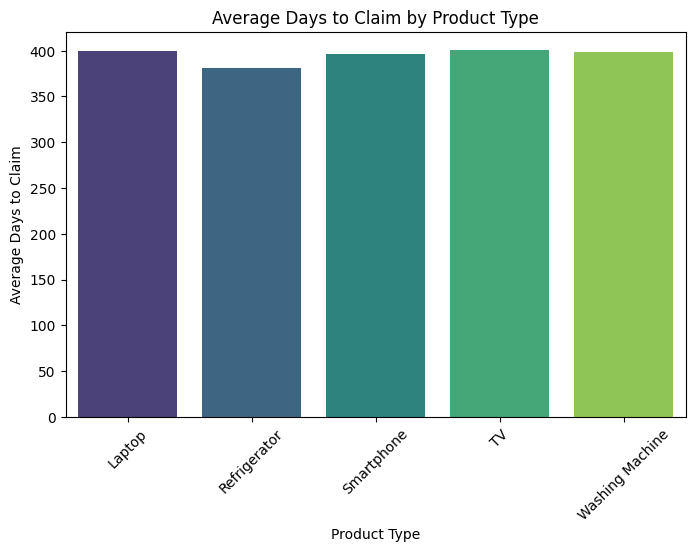

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# --------------------------
# 1. Bar chart: Claims by Product_Type
# --------------------------
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Product_Type', order=df['Product_Type'].value_counts().index)
plt.title("Number of Claims by Product Type")
plt.ylabel("Number of Claims")
plt.xlabel("Product Type")
plt.xticks(rotation=45)
plt.show()

# --------------------------
# 2. Pie chart: Claims Under Warranty vs Out of Warranty
# --------------------------
warranty_counts = df['Claim_Under_Warranty'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(warranty_counts, labels=['Under Warranty', 'Out of Warranty'], autopct='%1.1f%%', colors=['#4CAF50','#FF5722'])
plt.title("Claims Under Warranty vs Out of Warranty")
plt.show()

# --------------------------
# 3. Pie chart: Approved vs Rejected Claims
# --------------------------
# Assuming Target = 1 means Approved, 0 = Rejected
approval_counts = df['Target'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(approval_counts, labels=['Approved', 'Rejected'], autopct='%1.1f%%', colors=['#2196F3','#F44336'])
plt.title("Claim Approval Status")
plt.show()

# --------------------------
# 4. Bar chart: Average Days to Claim by Product_Type
# --------------------------
avg_days = df.groupby('Product_Type')['Days_To_Claim'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=avg_days, x='Product_Type', y='Days_To_Claim', palette='viridis')
plt.title("Average Days to Claim by Product Type")
plt.ylabel("Average Days to Claim")
plt.xlabel("Product Type")
plt.xticks(rotation=45)
plt.show()

# --------------------------
# 5. Map: Claims by Region (interactive)
# --------------------------
# If your Region names are like Delhi, Chennai, etc., Plotly can map them using choropleth
region_counts = df.groupby('Region')['Claim_Under_Warranty'].count().reset_index(name='Num_Claims')

fig = px.choropleth(region_counts,
                    locations='Region',
                    locationmode='country names',  # India region names
                    color='Num_Claims',
                    title='Number of Claims by Region',
                    color_continuous_scale='Reds')
fig.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# --------------------------
# 1. Encode categorical features
# --------------------------
le_product = LabelEncoder()
le_region = LabelEncoder()

df['Product_Type_enc'] = le_product.fit_transform(df['Product_Type'])
df['Region_enc'] = le_region.fit_transform(df['Region'])

# --------------------------
# 2. Features and target
# --------------------------
X = df[['Product_Type_enc', 'Region_enc', 'Days_To_Claim', 'Claim_Under_Warranty']].copy()
X['Claim_Under_Warranty'] = X['Claim_Under_Warranty'].astype(int)
y = df['Target']  # 1 = Approved, 0 = Rejected

# --------------------------
# 3. Train-test split
# --------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --------------------------
# 4. Train Random Forest model
# --------------------------
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# --------------------------
# 5. Evaluate model
# --------------------------
accuracy = clf.score(X_test, y_test) * 100
print("Model Accuracy on Test Set:", round(accuracy, 2), "%")

# --------------------------
# 6. Predict probability for a new claim
# --------------------------
# Example new claim input (must exist in your dataset)
new_claim = {
    'Product_Type': df['Product_Type'].iloc[0],  # pick an existing product
    'Region': df['Region'].iloc[0],              # pick an existing region
    'Days_To_Claim': 20,
    'Claim_Under_Warranty': 1
}

# Check if the Product_Type and Region exist in the encoders
if new_claim['Product_Type'] not in le_product.classes_:
    raise ValueError(f"Product_Type '{new_claim['Product_Type']}' not found in dataset!")

if new_claim['Region'] not in le_region.classes_:
    raise ValueError(f"Region '{new_claim['Region']}' not found in dataset!")

# Encode categorical values
new_claim_enc = np.array([
    le_product.transform([new_claim['Product_Type']])[0],
    le_region.transform([new_claim['Region']])[0],
    new_claim['Days_To_Claim'],
    new_claim['Claim_Under_Warranty']
]).reshape(1, -1)

# Predict approval probability
prob = clf.predict_proba(new_claim_enc)[:,1][0]
print("Predicted Approval Probability:", round(prob*100, 2), "%")


Model Accuracy on Test Set: 62.26 %
Predicted Approval Probability: 1.0 %


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



In [ ]:
import ipywidgets as widgets
from IPython.display import display

# --------------------------
# 1. Dropdown for Product_Type
# --------------------------
product_dropdown = widgets.Dropdown(
    options=df['Product_Type'].unique(),
    description='Product Type:',
)

# --------------------------
# 2. Dropdown for Region
# --------------------------
region_dropdown = widgets.Dropdown(
    options=df['Region'].unique(),
    description='Region:',
)

# --------------------------
# 3. Slider for Days_To_Claim
# --------------------------
days_slider = widgets.IntSlider(
    value=10,
    min=0,
    max=int(df['Days_To_Claim'].max())+10,
    step=1,
    description='Days to Claim:',
    continuous_update=False
)

# --------------------------
# 4. Checkbox for Claim_Under_Warranty
# --------------------------
warranty_checkbox = widgets.Checkbox(
    value=True,
    description='Claim Under Warranty',
)

# --------------------------
# 5. Button to predict
# --------------------------
predict_button = widgets.Button(description="Predict Approval Probability")

# --------------------------
# 6. Output widget
# --------------------------
output = widgets.Output()

# --------------------------
# 7. Prediction function
# --------------------------
def predict_claim(b):
    with output:
        output.clear_output()
        new_claim = {
            'Product_Type': product_dropdown.value,
            'Region': region_dropdown.value,
            'Days_To_Claim': days_slider.value,
            'Claim_Under_Warranty': int(warranty_checkbox.value)
        }

        # Encode
        new_claim_enc = np.array([
            le_product.transform([new_claim['Product_Type']])[0],
            le_region.transform([new_claim['Region']])[0],
            new_claim['Days_To_Claim'],
            new_claim['Claim_Under_Warranty']
        ]).reshape(1, -1)

        # Predict probability
        prob = clf.predict_proba(new_claim_enc)[:,1][0]
        print(f"Predicted Approval Probability: {prob*100:.2f}%")

predict_button.on_click(predict_claim)

# --------------------------
# 8. Display widgets
# --------------------------
display(product_dropdown, region_dropdown, days_slider, warranty_checkbox, predict_button, output)


Dropdown(description='Product Type:', options=('Smartphone', 'Refrigerator', 'Laptop', 'Washing Machine', 'TV'…

Dropdown(description='Region:', options=('north', 'south', 'central', 'east', 'west'), value='north')

IntSlider(value=10, continuous_update=False, description='Days to Claim:', max=1067)

Checkbox(value=True, description='Claim Under Warranty')

Button(description='Predict Approval Probability', style=ButtonStyle())

Output()

In [ ]:
!pip install streamlit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 89.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 100.8 MB/s eta 0:00:00


In [ ]:
from google.colab import files
uploaded = files.upload()  # Select your CSV file from the dialog



Saving warranty_final.csv to warranty_final (3).csv


In [ ]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['warranty_final (3).csv']))


In [ ]:
print(df.columns)


Index(['Product_ID', 'Customer_ID', 'Purchase_Date', 'Warranty_Period',
       'Claim_Date', 'Claim_Status', 'Product_Type', 'Region', 'Issue_Type',
       'Repair_Cost', 'Warranty_Expired', 'Days_To_Claim',
       'Claim_Under_Warranty', 'Num_Claims_Per_Customer', 'Product_Type_enc',
       'Region_enc'],
      dtype='object')


In [ ]:
# Encode categorical features
from sklearn.preprocessing import LabelEncoder
le_product = LabelEncoder()
le_region = LabelEncoder()

df['Product_Type_enc'] = le_product.fit_transform(df['Product_Type'])
df['Region_enc'] = le_region.fit_transform(df['Region'])
df['Claim_Under_Warranty'] = df['Claim_Under_Warranty'].astype(int)

# ML Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Use Claim_Status as the target variable
X = df[['Product_Type_enc', 'Region_enc', 'Days_To_Claim', 'Claim_Under_Warranty']]
y = df['Claim_Status']  # <-- Changed from 'Target' to 'Claim_Status'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
!pip install streamlit pyngrok pandas scikit-learn plotly --quiet


In [ ]:
from google.colab import files
import io

# Upload the warranty CSV
uploaded = files.upload()  # Select your CSV file here
csv_file_name = list(uploaded.keys())[0]  # Get the uploaded file name


Saving warranty_final.csv to warranty_final (7).csv


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import io

st.set_page_config(page_title="Warranty Claims Dashboard", layout="wide")
st.title("📊 Warranty Claims Interactive Dashboard")

# --------------------------
# Load CSV directly from uploaded file
df = pd.read_csv(io.BytesIO(open('warranty_final.csv','rb').read()))
# --------------------------

# Encode categorical features
le_product = LabelEncoder()
le_region = LabelEncoder()

df['Product_Type_enc'] = le_product.fit_transform(df['Product_Type'])
df['Region_enc'] = le_region.fit_transform(df['Region'])
df['Claim_Under_Warranty'] = df['Claim_Under_Warranty'].astype(int)

# Convert Claim_Status to numeric: Approved=1, others=0
df['Claim_Status_Num'] = df['Claim_Status'].apply(lambda x: 1 if x=="Approved" else 0)

# Train ML Model
X = df[['Product_Type_enc','Region_enc','Days_To_Claim','Claim_Under_Warranty']]
y = df['Claim_Status_Num']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train,y_train)

# Sidebar Filters
st.sidebar.header("Filters")
product_filter = st.sidebar.selectbox("Select Product", ["All"] + list(df['Product_Type'].unique()))
region_filter = st.sidebar.selectbox("Select Region", ["All"] + list(df['Region'].unique()))

filtered_df = df.copy()
if product_filter != "All":
    filtered_df = filtered_df[filtered_df['Product_Type']==product_filter]
if region_filter != "All":
    filtered_df = filtered_df[filtered_df['Region']==region_filter]

# Tabs Layout
tab1, tab2, tab3 = st.tabs(["📌 Dashboard","🤖 Prediction","📈 Forecasts"])

# ---------------- Dashboard Tab ----------------
with tab1:
    st.subheader("Key Metrics")
    total_claims = filtered_df.shape[0]
    approved_claims = int(filtered_df['Claim_Status_Num'].sum())
    warranty_claims = int(filtered_df['Claim_Under_Warranty'].sum())
    avg_days = round(filtered_df['Days_To_Claim'].mean(),2)

    col1,col2,col3,col4 = st.columns(4)
    col1.metric("Total Claims", total_claims)
    col2.metric("Approved Claims", approved_claims, delta=f"{(approved_claims/total_claims*100):.1f}%" if total_claims>0 else "0%")
    col3.metric("Claims Under Warranty", warranty_claims)
    col4.metric("Average Days to Claim", avg_days)

    st.subheader("Visualizations")
    region_counts = filtered_df['Region'].value_counts().reset_index()
    region_counts.columns = ['Region','Claims']
    fig1 = px.bar(region_counts, x='Region', y='Claims', text='Claims', title="Claims per Region")
    st.plotly_chart(fig1,use_container_width=True)

    product_counts = filtered_df['Product_Type'].value_counts().reset_index()
    product_counts.columns = ['Product','Claims']
    fig2 = px.bar(product_counts, x='Product', y='Claims', text='Claims', title="Claims per Product")
    st.plotly_chart(fig2,use_container_width=True)

    fig3 = px.pie(filtered_df, names='Claim_Status',
                  title="Approved vs Rejected Claims", hole=0.4,
                  color='Claim_Status', color_discrete_map={'Approved':'green','Rejected':'red','Pending':'orange','No Claim':'gray'})
    st.plotly_chart(fig3,use_container_width=True)

    if 'Purchase_Date' in filtered_df.columns:
        filtered_df['Purchase_Date'] = pd.to_datetime(filtered_df['Purchase_Date'])
        monthly_claims = filtered_df.groupby(filtered_df['Purchase_Date'].dt.to_period('M')).size().reset_index(name='Claims')
        monthly_claims['Purchase_Date'] = monthly_claims['Purchase_Date'].dt.to_timestamp()
        fig4 = px.line(monthly_claims, x='Purchase_Date', y='Claims', title='Monthly Claims Trend')
        st.plotly_chart(fig4,use_container_width=True)

# ---------------- Prediction Tab ----------------
with tab2:
    st.subheader("Predict New Claim Approval")
    with st.form("predict_form"):
        product_input = st.selectbox("Product Type", df['Product_Type'].unique())
        region_input = st.selectbox("Region", df['Region'].unique())
        days_input = st.number_input("Days to Claim", min_value=0, max_value=int(df['Days_To_Claim'].max())+30, value=10)
        warranty_input = st.checkbox("Claim Under Warranty", value=True)
        submitted = st.form_submit_button("Predict Approval Probability")
        if submitted:
            new_claim_enc = np.array([
                le_product.transform([product_input])[0],
                le_region.transform([region_input])[0],
                days_input,
                int(warranty_input)
            ]).reshape(1,-1)
            prob = clf.predict_proba(new_claim_enc)[:,1][0]
            st.success(f"Predicted Approval Probability: {prob*100:.2f}%")

# ---------------- Forecasts Tab ----------------
with tab3:
    st.subheader("Forecast / Next-Year Predictions")
    prediction_option = st.selectbox("Select Prediction Type",
                                     ["Customer Claim Prediction","Product Claims Prediction","Region Claim Prediction"])
    if prediction_option=="Customer Claim Prediction":
        customer_forecast = filtered_df.groupby('Customer_ID')['Claim_Status_Num'].sum().reset_index()
        fig_cust = px.bar(customer_forecast, x='Customer_ID', y='Claim_Status_Num', title="Next-Year Customer Claim Prediction")
        st.plotly_chart(fig_cust,use_container_width=True)
    elif prediction_option=="Product Claims Prediction":
        prod_forecast = filtered_df.groupby('Product_Type')['Claim_Status_Num'].sum().reset_index()
        fig_prod = px.bar(prod_forecast, x='Product_Type', y='Claim_Status_Num', title="Next-Year Product Claims Prediction")
        st.plotly_chart(fig_prod,use_container_width=True)
    elif prediction_option=="Region Claim Prediction":
        region_forecast = filtered_df.groupby('Region')['Claim_Status_Num'].sum().reset_index()
        fig_region = px.bar(region_forecast, x='Region', y='Claim_Status_Num', title="Next-Year Region Claims Prediction")
        st.plotly_chart(fig_region,use_container_width=True)

# ---------------- Download Dataset ----------------
st.subheader("💾 Download Processed Dataset with Predictions")
filtered_df['Predicted_Approval_Probability'] = clf.predict_proba(X)[:,1]
filtered_df['Predicted_Status'] = clf.predict(X)
csv = filtered_df.to_csv(index=False).encode()
st.download_button("Download CSV", data=csv, file_name="warranty_processed.csv", mime="text/csv")


Overwriting app.py


In [ ]:
import os
os.rename('warranty_final (7).csv','warranty_final.csv')

In [ ]:
# app.py
import streamlit as st
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import io

st.set_page_config(page_title="Warranty Claims Dashboard", layout="wide")
st.title("📊 Warranty Claims Interactive Dashboard")

# --------------------------
csv_name = list(uploaded.keys())[0]  # automatically takes the uploaded CSV
df = pd.read_csv(io.BytesIO(uploaded[csv_name]))
# --------------------------

# Encode categorical features
le_product = LabelEncoder()
le_region = LabelEncoder()

df['Product_Type_enc'] = le_product.fit_transform(df['Product_Type'])
df['Region_enc'] = le_region.fit_transform(df['Region'])
df['Claim_Under_Warranty'] = df['Claim_Under_Warranty'].astype(int)

# Convert Claim_Status to numeric: Approved=1, others=0
df['Claim_Status_Num'] = df['Claim_Status'].apply(lambda x: 1 if x=="Approved" else 0)

# Train ML Model
X = df[['Product_Type_enc','Region_enc','Days_To_Claim','Claim_Under_Warranty']]
y = df['Claim_Status_Num']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train,y_train)

# Sidebar Filters
st.sidebar.header("Filters")
product_filter = st.sidebar.selectbox("Select Product", ["All"] + list(df['Product_Type'].unique()))
region_filter = st.sidebar.selectbox("Select Region", ["All"] + list(df['Region'].unique()))

filtered_df = df.copy()
if product_filter != "All":
    filtered_df = filtered_df[filtered_df['Product_Type']==product_filter]
if region_filter != "All":
    filtered_df = filtered_df[filtered_df['Region']==region_filter]

# Tabs Layout
tab1, tab2, tab3 = st.tabs(["📌 Dashboard","🤖 Prediction","📈 Forecasts"])

# ---------------- Dashboard Tab ----------------
with tab1:
    st.subheader("Key Metrics")
    total_claims = filtered_df.shape[0]
    approved_claims = int(filtered_df['Claim_Status_Num'].sum())
    warranty_claims = int(filtered_df['Claim_Under_Warranty'].sum())
    avg_days = round(filtered_df['Days_To_Claim'].mean(),2)

    col1,col2,col3,col4 = st.columns(4)
    col1.metric("Total Claims", total_claims)
    col2.metric("Approved Claims", approved_claims, delta=f"{(approved_claims/total_claims*100):.1f}%" if total_claims>0 else "0%")
    col3.metric("Claims Under Warranty", warranty_claims)
    col4.metric("Average Days to Claim", avg_days)

    st.subheader("Visualizations")

    # Claims per Region
    region_counts = filtered_df['Region'].value_counts().reset_index()
    region_counts.columns = ['Region','Claims']
    fig1 = px.bar(region_counts, x='Region', y='Claims', text='Claims', title="Claims per Region")
    st.plotly_chart(fig1,use_container_width=True)

    # Claims per Product
    product_counts = filtered_df['Product_Type'].value_counts().reset_index()
    product_counts.columns = ['Product','Claims']
    fig2 = px.bar(product_counts, x='Product', y='Claims', text='Claims', title="Claims per Product")
    st.plotly_chart(fig2,use_container_width=True)

    # Approved vs Rejected pie chart
    fig3 = px.pie(filtered_df, names='Claim_Status',
                  title="Approved vs Rejected Claims", hole=0.4,
                  color='Claim_Status', color_discrete_map={'Approved':'green','Rejected':'red','Pending':'orange','No Claim':'gray'})
    st.plotly_chart(fig3,use_container_width=True)

    # Monthly Claims Trend
    if 'Purchase_Date' in filtered_df.columns:
        filtered_df['Purchase_Date'] = pd.to_datetime(filtered_df['Purchase_Date'])
        monthly_claims = filtered_df.groupby(filtered_df['Purchase_Date'].dt.to_period('M')).size().reset_index(name='Claims')
        monthly_claims['Purchase_Date'] = monthly_claims['Purchase_Date'].dt.to_timestamp()
        fig4 = px.line(monthly_claims, x='Purchase_Date', y='Claims', title='Monthly Claims Trend')
        st.plotly_chart(fig4,use_container_width=True)

# ---------------- Prediction Tab ----------------
with tab2:
    st.subheader("Predict New Claim Approval")
    with st.form("predict_form"):
        product_input = st.selectbox("Product Type", df['Product_Type'].unique())
        region_input = st.selectbox("Region", df['Region'].unique())
        days_input = st.number_input("Days to Claim", min_value=0, max_value=int(df['Days_To_Claim'].max())+30, value=10)
        warranty_input = st.checkbox("Claim Under Warranty", value=True)
        submitted = st.form_submit_button("Predict Approval Probability")
        if submitted:
            new_claim_enc = np.array([
                le_product.transform([product_input])[0],
                le_region.transform([region_input])[0],
                days_input,
                int(warranty_input)
            ]).reshape(1,-1)
            prob = clf.predict_proba(new_claim_enc)[:,1][0]
            st.success(f"Predicted Approval Probability: {prob*100:.2f}%")

# ---------------- Forecasts Tab ----------------
with tab3:
    st.subheader("Forecast / Next-Year Predictions")
    prediction_option = st.selectbox("Select Prediction Type",
                                     ["Customer Claim Prediction",
                                      "Product Claims Prediction",
                                      "Region Claim Prediction"])
    if prediction_option=="Customer Claim Prediction":
        customer_forecast = filtered_df.groupby('Customer_ID')['Claim_Status_Num'].sum().reset_index()
        fig_cust = px.bar(customer_forecast, x='Customer_ID', y='Claim_Status_Num', title="Next-Year Customer Claim Prediction")
        st.plotly_chart(fig_cust,use_container_width=True)
    elif prediction_option=="Product Claims Prediction":
        prod_forecast = filtered_df.groupby('Product_Type')['Claim_Status_Num'].sum().reset_index()
        fig_prod = px.bar(prod_forecast, x='Product_Type', y='Claim_Status_Num', title="Next-Year Product Claims Prediction")
        st.plotly_chart(fig_prod,use_container_width=True)
    elif prediction_option=="Region Claim Prediction":
        region_forecast = filtered_df.groupby('Region')['Claim_Status_Num'].sum().reset_index()
        fig_region = px.bar(region_forecast, x='Region', y='Claim_Status_Num', title="Next-Year Region Claims Prediction")
        st.plotly_chart(fig_region,use_container_width=True)

# ---------------- Download Dataset ----------------
st.subheader("💾 Download Processed Dataset with Predictions")
filtered_df['Predicted_Approval_Probability'] = clf.predict_proba(X)[:,1]
filtered_df['Predicted_Status'] = clf.predict(X)
csv = filtered_df.to_csv(index=False).encode()
st.download_button("Download CSV", data=csv, file_name="warranty_processed.csv", mime="text/csv")


2025-08-21 13:24:08.382 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-21 13:24:08.383 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-21 13:24:08.384 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-21 13:24:08.384 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-21 13:24:08.565 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-21 13:24:08.566 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-21 13:24:08.567 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-21 13:24:08.569 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

False

In [ ]:
from pyngrok import ngrok
ngrok.kill()


In [ ]:
!streamlit run app.py &>/content/logs.txt &
from pyngrok import ngrok
url = ngrok.connect(8501)
print("Open this URL in your browser:", url)


Open this URL in your browser: NgrokTunnel: "https://7fbb451713a4.ngrok-free.app" -> "http://localhost:8501"
